In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from mnist import load_dataset

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [2]:
X_train, y_train, X_valid, y_valid, X_test, y_test = load_dataset()

X_train = np.vstack([X_train, X_valid])

In [4]:
n, *_ = X_train.shape
X_train_flat = X_train.reshape((n, -1))

classifier = MLPClassifier((512), batch_size=50, learning_rate_init=0.09)

classifier.fit(X_train_flat, y_train)

Normalized confusion matrix
[[9.84863774e-01 0.00000000e+00 5.04540868e-03 1.00908174e-03
  1.00908174e-03 0.00000000e+00 3.02724521e-03 0.00000000e+00
  1.00908174e-03 4.03632694e-03]
 [0.00000000e+00 9.90601504e-01 9.39849624e-04 1.87969925e-03
  0.00000000e+00 0.00000000e+00 1.87969925e-03 1.87969925e-03
  2.81954887e-03 0.00000000e+00]
 [2.02020202e-03 1.01010101e-03 9.76767677e-01 5.05050505e-03
  0.00000000e+00 0.00000000e+00 1.01010101e-03 6.06060606e-03
  8.08080808e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.82524272e-03 9.80582524e-01
  0.00000000e+00 4.85436893e-03 0.00000000e+00 1.94174757e-03
  4.85436893e-03 1.94174757e-03]
 [1.01729400e-03 3.05188199e-03 1.01729400e-03 0.00000000e+00
  9.73550356e-01 1.01729400e-03 1.01729400e-03 1.01729400e-03
  2.03458800e-03 1.62767040e-02]
 [1.09289617e-03 0.00000000e+00 3.27868852e-03 6.55737705e-03
  0.00000000e+00 9.65027322e-01 1.20218579e-02 0.00000000e+00
  7.65027322e-03 4.37158470e-03]
 [4.13650465e-03 0.00000000e+0

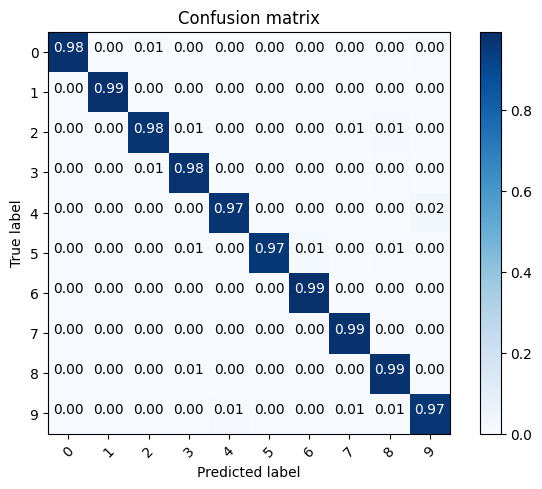

In [19]:
n, *_ = X_valid.shape
X_valid_flat = X_valid.reshape((n, -1))

predictions = classifier.predict(X_valid_flat)

plot_confusion_matrix(confusion_matrix(y_valid, predictions), range(10))

Normalized confusion matrix
[[9.91836735e-01 0.00000000e+00 1.02040816e-03 1.02040816e-03
  1.02040816e-03 1.02040816e-03 2.04081633e-03 1.02040816e-03
  1.02040816e-03 0.00000000e+00]
 [0.00000000e+00 9.93832599e-01 1.76211454e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.64317181e-03 0.00000000e+00
  1.76211454e-03 0.00000000e+00]
 [9.68992248e-04 9.68992248e-04 9.85465116e-01 2.90697674e-03
  9.68992248e-04 0.00000000e+00 0.00000000e+00 4.84496124e-03
  3.87596899e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.97029703e-03 9.85148515e-01
  0.00000000e+00 1.98019802e-03 0.00000000e+00 3.96039604e-03
  4.95049505e-03 9.90099010e-04]
 [2.03665988e-03 1.01832994e-03 1.01832994e-03 1.01832994e-03
  9.79633401e-01 0.00000000e+00 3.05498982e-03 2.03665988e-03
  2.03665988e-03 8.14663951e-03]
 [1.12107623e-03 0.00000000e+00 0.00000000e+00 1.00896861e-02
  0.00000000e+00 9.73094170e-01 3.36322870e-03 1.12107623e-03
  6.72645740e-03 4.48430493e-03]
 [4.17536534e-03 2.08768267e-0

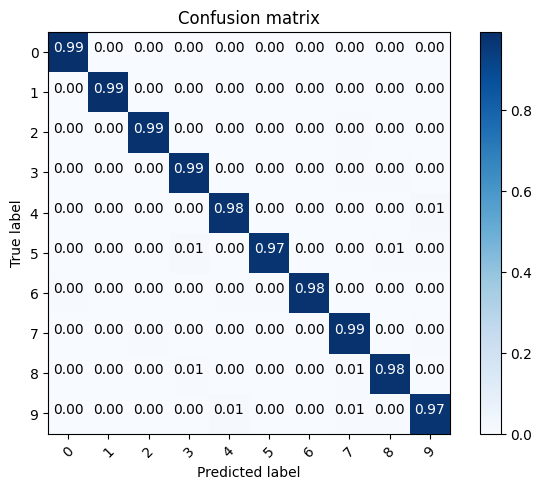

In [20]:
n, *_ = X_test.shape
X_test_flat = X_test.reshape((n, -1))

predictions = classifier.predict(X_test_flat)

plot_confusion_matrix(confusion_matrix(y_test, predictions), range(10))

In [21]:
from pickle import dump

with open('model.dat', 'wb') as file:
    dump(classifier, file)